# Домашняя работа "Оценка точности модели, переобучение, регуляризация"

### Задание:
<ol>
    <li>Посчитать tpr и fpr в ноутбуке к лекции. (true и false positive rate)</li>
    <li>Убедиться, что график ROC AUC получается таким же, как и штатными средствами.</li>
    <li>Построить график Precision - Recall на этих же данных.</li>
</ol>
В задании необходимо убедиться, что график roc auc построенный руками и встроенной функцией sklearn совпадают. То есть, необходимо руками повторить алгоритм roc auc

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt


In [54]:
data = pd.read_csv('data/affair_data.csv')
data.head()


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [55]:
X = data[data.columns[:-1]]
X.head(2)


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0


In [56]:
Y = data['affair']


In [57]:
model = LogisticRegression()


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)


In [59]:
model.fit(X_train, Y_train)


LogisticRegression()

In [60]:
predictions = model.predict_proba(X_test)
predictions


array([[0.37442487, 0.62557513],
       [0.92523133, 0.07476867],
       [0.68436963, 0.31563037],
       ...,
       [0.54059867, 0.45940133],
       [0.79790213, 0.20209787],
       [0.77284695, 0.22715305]])

In [61]:
model.score(X_test, Y_test)


0.7319371727748691

In [62]:
def roc_curve(y, prob):

    tpr_list = []
    fpr_list = []
    threshold = np.linspace(1.1, 0, 100)

    for t in threshold:
        y_pred = np.zeros(y.shape[0])
        y_pred[prob >= t] = 1

        TN = y_pred[(y_pred == y) & (y == 0)].shape[0]
        TP = y_pred[(y_pred == y) & (y == 1)].shape[0]
        FP = y_pred[(y_pred != y) & (y == 0)].shape[0]
        FN = y_pred[(y_pred != y) & (y == 1)].shape[0]

        TPR = TP / (TP + FN)
        FPR = FP / (FP + TN)

        tpr_list.append(TPR)
        fpr_list.append(FPR)
        
    return fpr_list, tpr_list, threshold


In [63]:
# manual calculation
FPR, TPR, threshold = roc_curve(Y_test, predictions[:, 1])


In [64]:
# calculation using by sklearn
fpr, tpr, thres = metrics.roc_curve(Y_test, predictions[:, 1])


Text(0.5, 1.0, 'ROC curve sklearn vs manually')

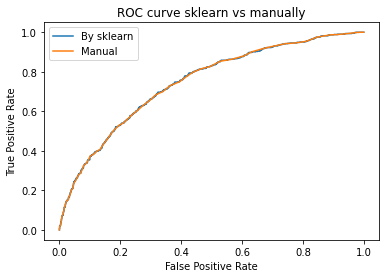

In [65]:
plt.plot(fpr, tpr, label='By sklearn') 
plt.plot(FPR, TPR, label='Manual')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc=0)
plt.title('ROC curve sklearn vs manually')
